In [32]:
import sklearn
import pandas as pd
import numpy as np

df = pd.read_csv('ccdefault.csv',header=None)
df.dropna()
X=df.iloc[1:, 1:-1]
y=df.iloc[1:, -1]
df.head()


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [33]:
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


# PART I RANDOM TRAIN TEST SPLIT

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
import matplotlib.pyplot as plt

test_accrancy = []
train_accrancy = []

for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state=i)
    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    pred_train = dt.predict(X_train)
    train_accrancy.append(accuracy_score(y_train, pred_train))
    pred_test = dt.predict(X_test)
    test_accrancy.append(accuracy_score(y_test, pred_test))
print("train set mean: ", np.mean(train_accrancy))
print("train set std: ", np.std(train_accrancy))
print("test set mean: ", np.mean(test_accrancy))
print("test set std: ", np.std(test_accrancy))


train set mean:  0.9993740740740741
train set std:  7.490277191168311e-05
test set mean:  0.7236999999999999
test set std:  0.008257589102018681


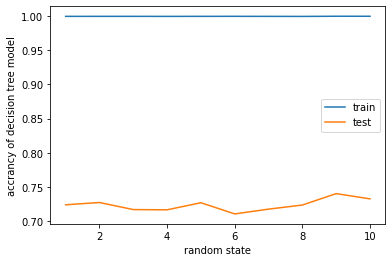

In [35]:
a=[1,2,3,4,5,6,7,8,9,10]
plt.plot(a,train_accrancy)
plt.plot(a,test_accrancy)
plt.legend(['train','test'])
plt.xlabel("random state")
plt.ylabel("accrancy of decision tree model")
plt.show()



# PART II CROSS-VALIDATION

In [43]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

dt_cv= DecisionTreeClassifier()
dt_cv.fit(X_train, y_train)
pred_train_cv = dt_cv.predict(X_train)
pred_test_cv = dt_cv.predict(X_test)

train_accrancy_cv = cross_val_score(dt_cv, X_train, y_train, cv=10, n_jobs=-1)
test_accrancy_cv = cross_val_score(dt_cv, X_test, y_test, cv=10, n_jobs=-1)

print("train set mean: ", np.mean(train_accrancy_cv))
print("train set std: ", np.std(train_accrancy_cv))
print("test set mean: ", np.mean(test_accrancy_cv))
print("test set std: ", np.std(test_accrancy_cv))



train set mean:  0.7245923793781143
train set std:  0.008157050158045975
test set mean:  0.7350248336092623
test set std:  0.023813986782610125


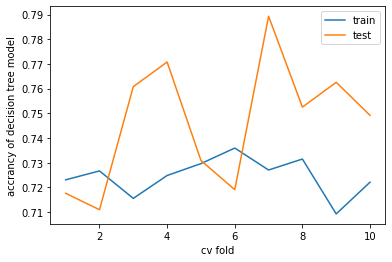

In [45]:
a=[1,2,3,4,5,6,7,8,9,10]
plt.plot(a,train_accurancy_cv)
plt.plot(a,test_accurancy_cv)
plt.legend(['train','test'])
plt.xlabel("cv fold")
plt.ylabel("accrancy of decision tree model")
plt.show()

In [17]:
print("My name is JIE QIAN")
print("My NetID is: jieqian2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is JIE QIAN
My NetID is: jieqian2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
